## Simple Linear Regression

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Reading data set 

In [3]:
df = pd.read_csv('height-weight.csv')
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


Text(0, 0.5, 'Height')

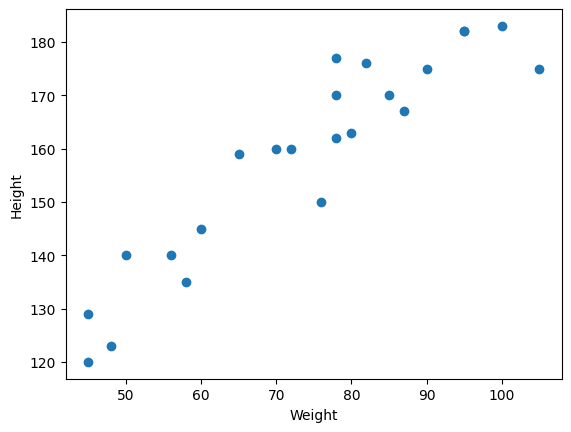

In [4]:
## Looking data in scatter plot 
plt.scatter(df['Weight'], df['Height'])
plt.xlabel('Weight')
plt.ylabel('Height')

In [5]:
## Dividing our data into independent and dependent features
X = df[['Weight']] ## independent feature 
y = df['Height'] ## dependent feature


In [6]:
## Train Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.20) ## 20% data will be in test data and 80% data will be in training data


In [7]:
X.shape

(23, 1)

In [8]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((18, 1), (5, 1), (18,), (5,))

In [9]:
## standardize the dataset train independent data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

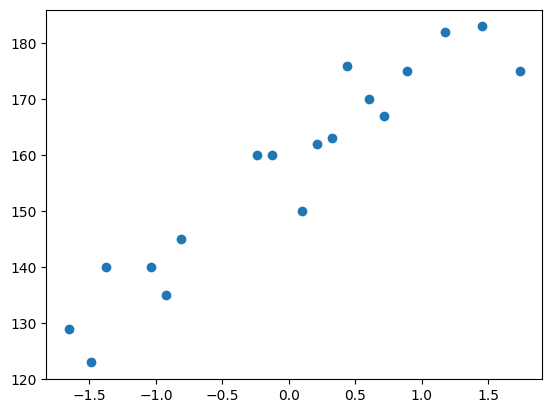

In [10]:
plt.scatter(X_train, y_train)

In [11]:
## Train the model (Simple Linear Regression Model)
from sklearn.linear_model import LinearRegression 

In [12]:
regressor = LinearRegression()

In [13]:
regressor.fit(X_train, y_train) ## training the model

LinearRegression()

In [14]:
print('slope or coefficient of weight is',regressor.coef_)
print('intercept of height is',regressor.intercept_)

slope or coefficient of weight is [17.03440872]
intercept of height is 157.5


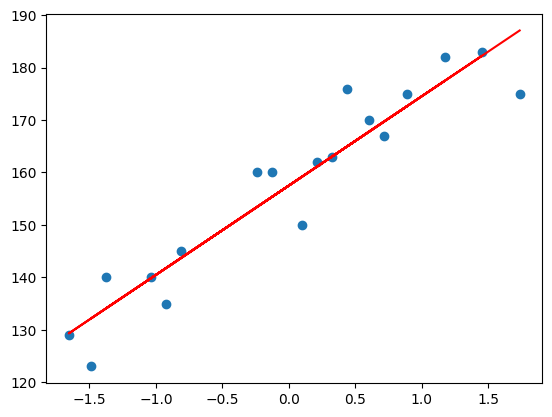

In [15]:
plt.scatter(X_train, y_train)
plt.plot(X_train, regressor.predict(X_train), color='red')


Prediction of train data 
1. predicted height output = intercept + coef_(Weights)
2. y_pred_train = 157.5 + 17.03(X_train)

Prediction of test data
1. predicted height output = intercept + coef_(Weights)
2. y_pred_test = 157.5 + 17.03(X_test)

In [16]:
y_pred_test = regressor.predict(X_test) ## predicting the values of test data

In [18]:
y_pred_test, y_test

(array([161.08467086, 161.08467086, 129.3041561 , 177.45645118,
        148.56507414]),
 15    177
 9     170
 0     120
 8     182
 17    159
 Name: Height, dtype: int64)

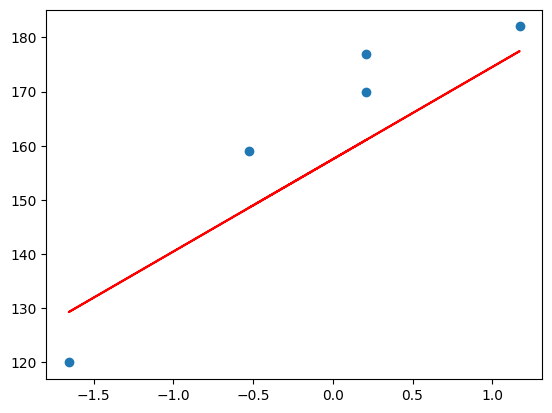

In [19]:
plt.scatter(X_test, y_test)
plt.plot(X_test, regressor.predict(X_test), color='red')

### Performance Metrics 

### MSE, MAE, RMSE
### R square and adjusted R square 

In [20]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [24]:
mse  = mean_squared_error(y_test, y_pred_test)
mae  = mean_absolute_error(y_test, y_pred_test)
rmse = np.sqrt(mse)
print('MSE is',mse)
print('MAE is',mae)     
print('RMSE is',rmse)


MSE is 109.77592599051664
MAE is 9.822657814519232
RMSE is 10.477400726827081


In [25]:
## R squared
r2   = r2_score(y_test, y_pred_test)
print('R2 score is',r2)

R2 score is 0.776986986042344


In [26]:
## Adjusted R squared
n = X_test.shape[0]  ## number of rows in test data
p = X_test.shape[1]  ## number of independent features in test data
adj_r2 = 1 - (1-r2)*(n-1)/(n-p-1)
print('Adjusted R2 score is',adj_r2)

Adjusted R2 score is 0.7026493147231252


In [27]:
## new data point weight is 80 

scaled_weight = scaler.transform([[80]])
scaled_weight

c:\Users\DELL\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[0.32350772]])

In [30]:
regressor.predict(scaled_weight)

array([163.01076266])

Text(0, 0.5, 'Predicted Height')

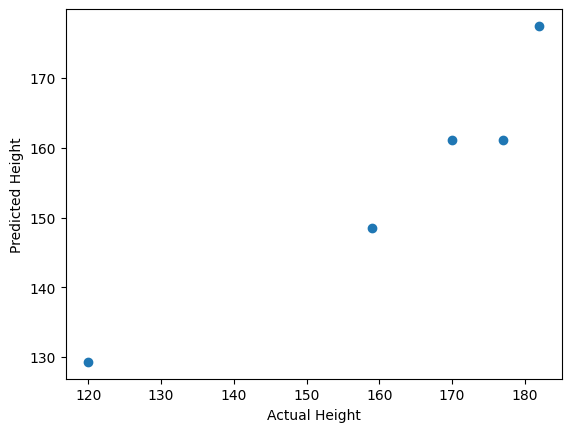

In [31]:
## Assumption of Linear Regression
## plot a scatter plot for the predicted values 
plt.scatter(y_test, y_pred_test)
plt.xlabel('Actual Height')
plt.ylabel('Predicted Height')

In [34]:
## Residuals
residuals = y_test - y_pred_test
residuals




15    15.915329
9      8.915329
0     -9.304156
8      4.543549
17    10.434926
Name: Height, dtype: float64

<Axes: xlabel='Height', ylabel='Count'>

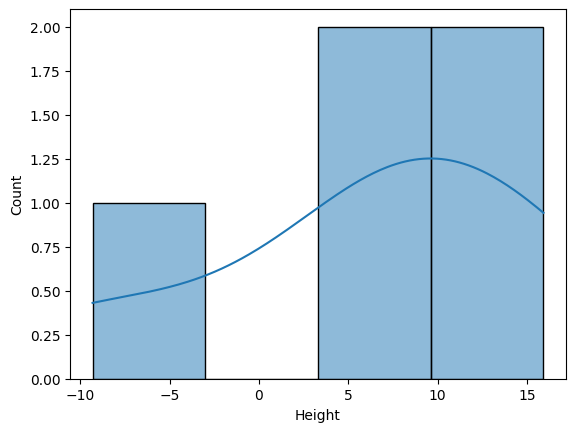

In [36]:
## Plot the residuals
import seaborn as sns
sns.histplot(residuals, kde=True)

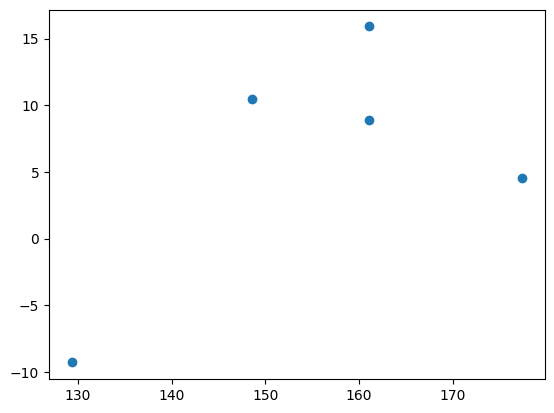

In [37]:
## scatter plot with respect to predicted values and residuals
plt.scatter(y_pred_test, residuals)
